In [1]:
# manipulacja danymi
import numpy as np
import pandas as pd

# wizualizacja danych
import matplotlib.pyplot as plt
import seaborn as sns

# statystyczna analiza danych
from scipy import stats

# przygotowanie danych
from sklearn.preprocessing import StandardScaler, MinMaxScaler
dataset = pd.read_csv('titanic.csv')
dataset.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
fare_values = dataset.loc[dataset['Fare'].notnull(), 'Fare'].values
print(fare_values.shape)

(891,)


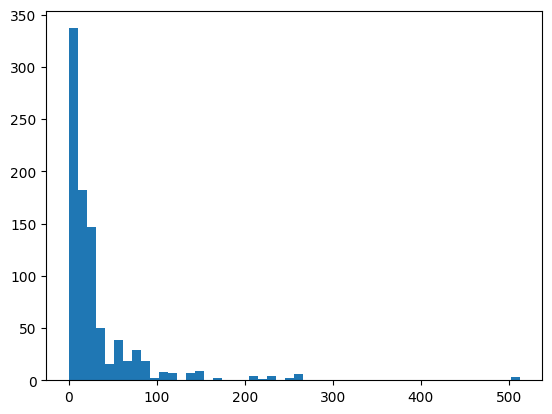

In [3]:
plt.hist(fare_values, bins=50)
plt.show()

Średnia

In [4]:
mean_fare = np.round(np.mean(fare_values))
print(mean_fare)

32.0


Mediana

In [5]:
median_fare = np.median(fare_values)
print(median_fare)

14.4542


Moda

In [6]:
mode_fare = stats.mode(fare_values)
print(mode_fare)

ModeResult(mode=array([8.05]), count=array([43]))


C:\Users\sliwi\AppData\Local\Temp\ipykernel_23124\348530861.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_fare = stats.mode(fare_values)


Kwartyle

In [7]:
q0 = np.quantile(fare_values, 0.0)
q1 = np.round(np.quantile(fare_values, 0.25))
q3 = np.round(np.quantile(fare_values, 0.75))
q4 = np.round(np.quantile(fare_values, 1.0))
print(f'Q0: {q0}')
print(f'Q1: {q1}')
print(f'Q2: {median_fare}')
print(f'Q3: {q3}')
print(f'Q4: {q4}')

Q0: 0.0
Q1: 8.0
Q2: 14.4542
Q3: 31.0
Q4: 512.0


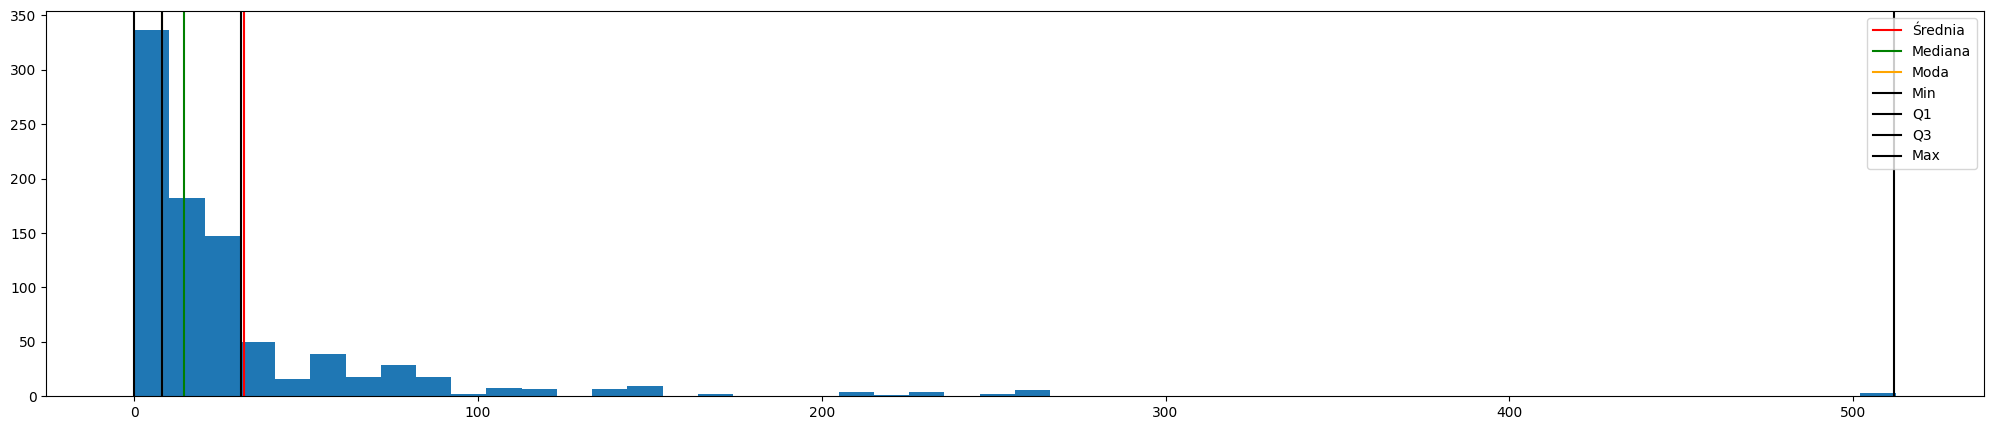

In [8]:
plt.figure(figsize=(25,5))
plt.hist(fare_values, bins=50)
plt.axvline(x = mean_fare, color='red', label = 'Średnia')
plt.axvline(x = median_fare, color='green', label = 'Mediana')
plt.axvline(x = mode_fare[0], color='orange', label = 'Moda')
plt.axvline(x = q0, color='black', label = 'Min')
plt.axvline(x = q1, color='black', label = 'Q1')
plt.axvline(x = q3, color='black', label = 'Q3')
plt.axvline(x = q4, color='black', label = 'Max')
plt.legend(loc='upper right')
plt.show()

Zakres

In [9]:
range_fare = max(fare_values) - min(fare_values)
print(range_fare)

512.3292


Rozstęp międzykwartylowy - IQR

In [10]:
iqr = q3 - q1
print(iqr)

23.0


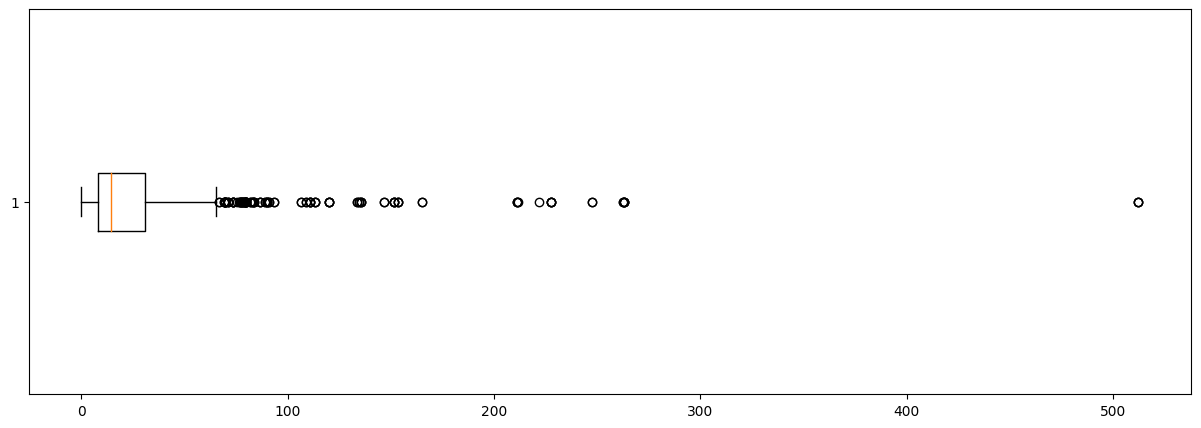

In [11]:
plt.figure(figsize=(15,5))
plt.boxplot(fare_values,vert=False)
plt.show()

Wariancja

In [12]:
variance_fare = np.var(fare_values, ddof=1)
print(variance_fare)

2469.436845743116


Odchylenie standardowe

In [13]:
standard_deviation_fare = np.std(fare_values, ddof=1)
print(standard_deviation_fare)

49.6934285971809


Skalowanie zmiennej

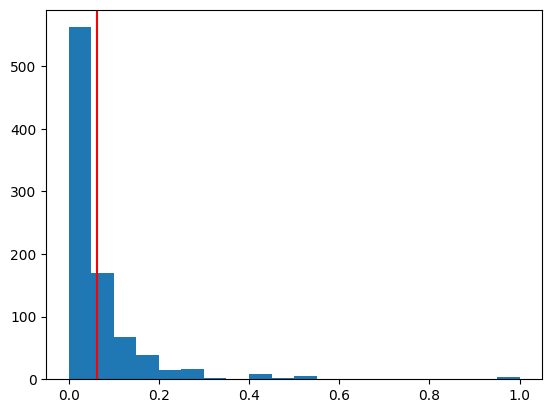

Średnia: 0.06285842768394742
Odchylenie standardowe: 0.09699511290236998


In [14]:
scaler_MinMax = MinMaxScaler()
normalized_fare_values = scaler_MinMax.fit_transform(fare_values.reshape(-1, 1))
plt.hist(normalized_fare_values, bins=20)
plt.axvline(x = normalized_fare_values.mean(), color='red', label = 'Średnia')
plt.show()
print(f'Średnia: {normalized_fare_values.mean()}')
print(f'Odchylenie standardowe: {np.std(normalized_fare_values, ddof=1)}')